In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans


In [2]:
uni=pd.read_csv('Universities.csv')

In [9]:
#Normalization function
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_uni_df=scaler.fit_transform(uni.iloc[:,1:])

In [10]:
scaled_uni_df

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

In [14]:
#How to find optimum  no of clusters
#K-Means algorithm aims to choose centroid that are near
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_uni_df)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'wcss')

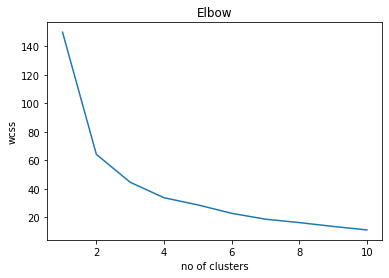

In [16]:
plt.plot(range(1,11),wcss)
plt.title('Elbow')
plt.xlabel('no of clusters')
plt.ylabel('wcss')

In [17]:
#Build the clustering algorithm
from sklearn.cluster import KMeans
clust_new=KMeans(4,random_state=42)
clust_new.fit(scaled_uni_df)

KMeans(n_clusters=4, random_state=42)

In [19]:
#Assign clusters to dataset
uni['clust_new']=clust_new.labels_

In [20]:
#Thses are standardized value
clust_new.cluster_centers_

array([[ 0.80273428,  0.68086062, -0.90136381, -0.43159988,  0.44062556,
         0.79526289],
       [-1.93029211, -1.98148647,  1.59348244,  1.63857398, -1.23359906,
        -1.68680366],
       [-0.12658888,  0.06407139,  0.2224667 ,  0.04516743, -0.38064332,
         0.02028221],
       [ 0.88122441,  0.5787432 , -0.24316128, -1.56078563,  2.38759968,
        -0.3064867 ]])

In [24]:
uni.groupby('clust_new').agg(['mean']).reset_index()

,clust_new,SAT,Top10,Accept,SFRatio,Expenses,GradRate
,,mean,mean,mean,mean,mean,mean
0,0,1351.666667,89.444444,21.777778,11.00,33615.555556,93.777778
1,1,1061.500000,38.750000,70.000000,19.25,9953.000000,71.750000
2,2,1253.000000,77.700000,43.500000,12.90,22008.200000,86.900000
3,3,1360.000000,87.500000,34.500000,6.50,61133.000000,84.000000


In [25]:
uni

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clust_new
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,3
2,CMU,1260,62,59,9,25026,72,2
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,2
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
7,Georgetown,1255,74,24,12,20126,92,2
8,Harvard,1400,91,14,11,39525,97,0
9,JohnsHopkins,1305,75,44,7,58691,87,3
